## Penjelasan Dataset yang digunakan

In [ ]:
## Berikan penjelasan terkait data apa yang digunakan diantaranya:
# 1. Kasus yang diambil
# 2. Penjelasan setiap kolomnya
# 3. Import library
# 4. Load data

1. Kasus yang Diambil
Kasus ini berkaitan dengan deteksi email phishing menggunakan metode data science.
Phishing adalah upaya untuk menipu pengguna agar memberikan informasi pribadi seperti kata sandi atau nomor kartu kredit melalui email palsu yang terlihat sah.
Tujuan dari analisis ini adalah membangun model machine learning yang mampu membedakan antara email phishing dan email asli (legitimate) berdasarkan fitur teks dan karakteristik lainnya.

In [66]:
# 2. Penjelasan setiap kolomnya
import pandas as pd

# Load dataset
df = pd.read_csv('Phishing_Email.csv')

# Tampilkan 5 baris pertama
df.head()

# Informasi umum dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   sender    1000 non-null   object
 1   receiver  978 non-null    object
 2   date      1000 non-null   object
 3   subject   998 non-null    object
 4   body      1000 non-null   object
 5   urls      1000 non-null   int64 
 6   label     1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [67]:
# 3. Import library
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
# 4. Load file CSV
df = pd.read_csv('Phishing_Email.csv')

# Tampilkan informasi dan contoh data
print("Ukuran Dataset:", df.shape)
print("\nTipe Data:")
print(df.dtypes)

Ukuran Dataset: (1000, 7)

Tipe Data:
sender      object
receiver    object
date        object
subject     object
body        object
urls         int64
label        int64
dtype: object


## Data Understanding

In [ ]:
# 1. Jumlah baris data
# 2. Panjang rata-rata setiap baris
# 3. Cek data duplikasi
# 4. Cek data kosong
# 5. Distribusi data menggunakan bar chart, line chart atau word cloud, seperti kata yang sering muncul.

,sender,receiver,date,subject,body,urls,label
0,MetaMask <info@sofamekar.com>,jose@monkey.org,2022-12-27 10:56:49,Your MetaMask wallet will be suspended,Verify your MetaMask Wallet Our system has sho...,1,1
1,MetaMask <info@sofamekar.com>,jose@monkey.org,2022-12-27 10:56:49,Your MetaMask wallet will be suspended,Verify your MetaMask Wallet Our system has sho...,1,1
2,Fastway\n\t<info.fastway.co.za_info.fastway.co...,jose@monkey.org,2022-12-21 01:33:32,Your shipment is on the way,Announcing JotForm Tables: When a spreadsheet ...,1,1
3,Fastway\n\t<info.fastway.co.za_info.fastway.co...,jose@monkey.org,2022-12-21 01:33:32,Your shipment is on the way,Announcing JotForm Tables: When a spreadsheet ...,1,1
4,Help Center\n\t<info.help-center.co.za_info.he...,jose@monkey.org,2022-12-20 23:00:27,Netflix : We're having some trouble with your ...,"HELLO, Please note that, your monthly paymen...",1,1


Jumlah baris data: 1000
Panjang rata-rata setiap baris: 1269.63
Jumlah data duplikat: 496

Jumlah data kosong per kolom:
sender       0
receiver    22
date         0
subject      2
body         0
urls         0
label        0
dtype: int64

Kolom teks yang ditemukan: ['sender', 'receiver', 'date', 'subject', 'body']

10 Kata yang paling sering muncul:
com: 530
org: 406
monkey: 376
support: 120
co: 101
info: 98
admin: 90
center: 82
mail: 80
noreply: 80


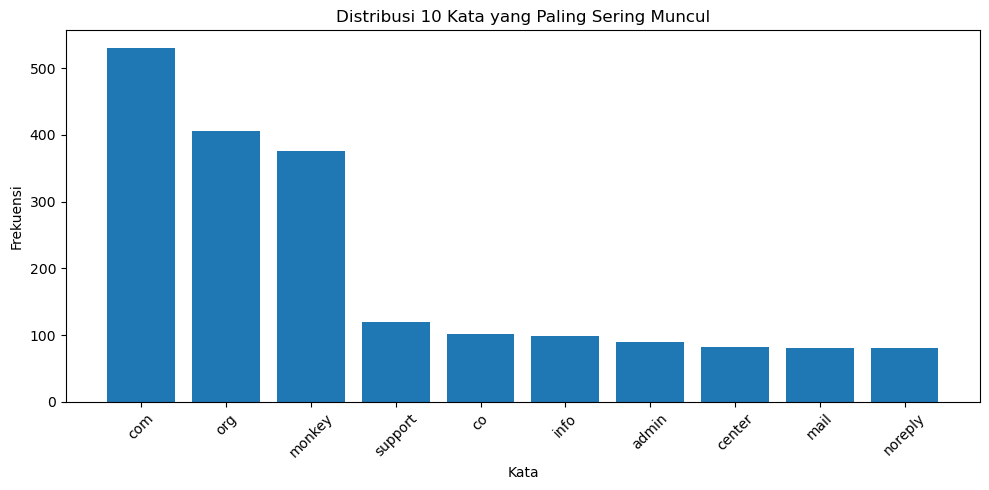

In [69]:
# ===============================
# Tahap Data Understanding
# ===============================

# Import library
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import re

# 1. Membaca dataset
file_path = "Phishing_Email.csv"  # Ganti jika file ada di path lain
df = pd.read_csv(file_path)

# 2. Menampilkan 5 data teratas
display(df.head())

# ===============================
# 1. Jumlah baris data
# ===============================
jumlah_baris = len(df)
print("Jumlah baris data:", jumlah_baris)

# ===============================
# 2. Panjang rata-rata setiap baris
# ===============================
panjang_rata2 = df.astype(str).apply(lambda x: x.str.len().sum(), axis=1).mean()
print("Panjang rata-rata setiap baris:", round(panjang_rata2, 2))

# ===============================
# 3. Cek data duplikasi
# ===============================
jumlah_duplikat = df.duplicated().sum()
print("Jumlah data duplikat:", jumlah_duplikat)

# ===============================
# 4. Cek data kosong (missing values)
# ===============================
print("\nJumlah data kosong per kolom:")
print(df.isnull().sum())

# ===============================
# 5. Distribusi kata yang sering muncul
# ===============================
# Mencari kolom teks (biasanya 'body', 'text', atau 'content')
text_columns = [col for col in df.columns if df[col].dtype == "object"]
print("\nKolom teks yang ditemukan:", text_columns)

if text_columns:
    # Ambil kolom teks pertama untuk analisis frekuensi kata
    all_text = " ".join(df[text_columns[0]].dropna().astype(str))

    # Tokenisasi dan hitung frekuensi kata
    words = re.findall(r'\b\w+\b', all_text.lower())
    word_freq = Counter(words).most_common(10)

    # Tampilkan hasil 10 kata teratas
    print("\n10 Kata yang paling sering muncul:")
    for word, freq in word_freq:
        print(f"{word}: {freq}")

    # Visualisasi bar chart
    plt.figure(figsize=(10, 5))
    plt.bar([w[0] for w in word_freq], [w[1] for w in word_freq])
    plt.title("Distribusi 10 Kata yang Paling Sering Muncul")
    plt.xlabel("Kata")
    plt.ylabel("Frekuensi")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("Tidak ada kolom teks yang dapat dianalisis.")


## Data Text Processing

In [ ]:
# 1. Tokenisasi
# 2. Lemmatization
# 3. Stemming
# 4. Stopword removal (Tanda baca, angka dan kata)
# 5. Text Normalisasi
# 6. Matrix correlation (opsional)
# 7. Labeling data (Lexicon, Bert, atau polarity)
# 8. Text Vektorisasi
# 9. Data splitting dengan skala (0.8, 02)(0.9, 0.1)(0.75, 0.25)(0.85, 0.15) pilih salah satu dari beberapa skala yang ditentukan
# catatan (lakukan tahap 1- 5 apabila diperlukan, jika tidak langsung ke bagian 6-9)

In [70]:
# ==========================================
# TEXT PROCESSING PHISHING EMAIL DATASET
# ==========================================

import pandas as pd
import numpy as np
import re
import string
import nltk

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics.pairwise import cosine_similarity

# ==========================================
# 1. LOAD DATA
# ==========================================
df = pd.read_csv('phishing_Email.csv')
print("Jumlah Data:", len(df))
print("Kolom:", df.columns.tolist())

TEXT_COL = 'body'    # ✅ gunakan kolom isi email
LABEL_COL = 'label'  # ✅ label phishing / non-phishing

# ==========================================
# 2. TEXT NORMALIZATION
# ==========================================
def normalize_text(text):
    text = str(text).lower()
    text = re.sub(r'\d+', ' ', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df[TEXT_COL].apply(normalize_text)

# ==========================================
# 3. TOKENIZATION
# ==========================================
df['tokens'] = df['clean_text'].apply(word_tokenize)

# ==========================================
# 4. STOPWORD REMOVAL
# ==========================================
stop_words = set(stopwords.words('english'))
df['tokens'] = df['tokens'].apply(lambda x: [w for w in x if w not in stop_words])

# ==========================================
# 5. LEMMATIZATION
# ==========================================
lemmatizer = WordNetLemmatizer()
df['lemmatized'] = df['tokens'].apply(lambda x: [lemmatizer.lemmatize(w) for w in x])

# ==========================================
# 6. STEMMING
# ==========================================
stemmer = PorterStemmer()
df['stemmed'] = df['lemmatized'].apply(lambda x: [stemmer.stem(w) for w in x])

# ==========================================
# 7. SENTIMENT / LABELING (VADER)
# ==========================================
sia = SentimentIntensityAnalyzer()

def vader_label(text):
    compound = sia.polarity_scores(text)['compound']
    if compound >= 0.05:
        return 'positive'
    elif compound <= -0.05:
        return 'negative'
    else:
        return 'neutral'

df['sentiment'] = df['clean_text'].apply(vader_label)

# ==========================================
# 8. TEXT VEKTORISASI (TF-IDF)
# ==========================================
vectorizer = TfidfVectorizer(max_features=5000)
X = vectorizer.fit_transform(df['clean_text'])
y = df[LABEL_COL]  # label asli phishing / not phishing

# ==========================================
# 9. DATA SPLITTING (80% TRAIN, 20% TEST)
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Ukuran Train:", X_train.shape)
print("Ukuran Test :", X_test.shape)

# ==========================================
# 10. OPSIONAL: MATRIX CORRELATION
# ==========================================
sample_n = min(100, X.shape[0])
corr_matrix = cosine_similarity(X[:sample_n].toarray())
print("Matrix Korelasi ({} sample):".format(sample_n))
print(corr_matrix[:5, :5])


Jumlah Data: 1000
Kolom: ['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label']
Ukuran Train: (800, 5000)
Ukuran Test : (200, 5000)
Matrix Korelasi (100 sample):
[[1.         1.         0.10826602 0.10826602 0.14233256]
 [1.         1.         0.10826602 0.10826602 0.14233256]
 [0.10826602 0.10826602 1.         1.         0.10672886]
 [0.10826602 0.10826602 1.         1.         0.10672886]
 [0.14233256 0.14233256 0.10672886 0.10672886 1.        ]]


In [71]:
# ==========================================
# 1. IMPORT LIBRARY
# ==========================================
import pandas as pd
import numpy as np
import re
import string
import nltk
import tensorflow as tf

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# ==========================================
# 2. LOAD DATA
# ==========================================
df = pd.read_csv('phishing_Email.csv')
print("Jumlah Data:", len(df))
print("Kolom:", df.columns.tolist())

TEXT_COL = 'body'
LABEL_COL = 'label'

# Pastikan tidak ada missing value
df = df.dropna(subset=[TEXT_COL, LABEL_COL])

# ==========================================
# 3. TEXT CLEANING
# ==========================================
def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", " ", text)            # hapus URL
    text = re.sub(r'\d+', ' ', text)                # hapus angka
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = re.sub(r'\s+', ' ', text).strip()
    return text

df['clean_text'] = df[TEXT_COL].apply(clean_text)

# ==========================================
# 4. TOKENIZATION DAN STOPWORD REMOVAL
# ==========================================
stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = word_tokenize(text)
    filtered = [w for w in tokens if w not in stop_words]
    return ' '.join(filtered)

df['clean_text'] = df['clean_text'].apply(remove_stopwords)

# ==========================================
# 5. SPLIT DATA
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(
    df['clean_text'], df[LABEL_COL],
    test_size=0.2,
    random_state=42,
    stratify=df[LABEL_COL]
)

# ==========================================
# 6. TOKENIZER DAN PAD SEQUENCE
# ==========================================
max_words = 10000   # jumlah kata unik maksimum
max_len = 200       # panjang maksimum per sequence

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_len, padding='post', truncating='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=max_len, padding='post', truncating='post')

# ==========================================
# 7. MODEL LSTM
# ==========================================
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)
model.build(input_shape=(None, max_len))
model.summary()

model.summary()

# ==========================================
# 8. TRAINING
# ==========================================
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=10,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

# ==========================================
# 9. EVALUASI
# ==========================================
loss, acc = model.evaluate(X_test_pad, y_test, verbose=0)
print(f"\nAkurasi Model LSTM: {acc*100:.2f}%")

# ==========================================
# 10. PREDIKSI CONTOH
# ==========================================
sample = "Your account has been suspended. Click this link to verify."
seq = tokenizer.texts_to_sequences([sample])
pad = pad_sequences(seq, maxlen=max_len, padding='post')
pred = model.predict(pad)
print("\nPrediksi phishing:", "YA" if pred[0][0] > 0.5 else "TIDAK", f"(score={pred[0][0]:.4f})")


Jumlah Data: 1000
Kolom: ['sender', 'receiver', 'date', 'subject', 'body', 'urls', 'label']


C:\Users\Abdoel\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,419,905 (5.42 MB)

 Trainable params: 1,419,905 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_6 (Embedding)         │ (None, 200, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_6 (LSTM)                   │ (None, 128)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,419,905 (5.42 MB)

 Trainable params: 1,419,905 (5.42 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 32s 924ms/step - accuracy: 0.9837 - loss: 0.1377 - val_accuracy: 1.0000 - val_loss: 3.1294e-06
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 31s 503ms/step - accuracy: 1.0000 - loss: 2.0268e-05 - val_accuracy: 1.0000 - val_loss: 4.5142e-07
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 648ms/step - accuracy: 1.0000 - loss: 7.3881e-06 - val_accuracy: 1.0000 - val_loss: 3.5718e-07
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 18s 728ms/step - accuracy: 1.0000 - loss: 6.7334e-06 - val_accuracy: 1.0000 - val_loss: 3.3405e-07
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 16s 626ms/step - accuracy: 1.0000 - loss: 2.2482e-05 - val_accuracy: 1.0000 - val_loss: 2.9968e-07
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 556ms/step - accuracy: 1.0000 - loss: 7.4458e-06 - val_accuracy: 1.0000 - val_loss: 2.7642e-07
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 21s 546ms/step - accuracy: 1.0000 - loss: 5.0604e-06 - val_accuracy: 1.0000 - val_loss: 2.5786e-07
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 22s 622

## Data Modeling

In [ ]:
# Berikan Penjelasan tentang model yang dipilih (baik machine learning maupun deep learning)
# Disarankan menggunakan deep learning.

Model yang digunakan dalam penelitian ini adalah Long Short-Term Memory (LSTM), yang merupakan salah satu jenis Recurrent Neural Network (RNN) yang dirancang untuk memproses data berurutan seperti teks. LSTM dipilih karena mampu mengingat konteks dan hubungan antar kata dalam sebuah kalimat, sehingga lebih efektif dalam memahami makna dan pola bahasa yang sering muncul pada email phishing, seperti ajakan mendesak atau permintaan verifikasi akun. Arsitektur model terdiri dari embedding layer untuk representasi kata, diikuti oleh LSTM layer yang mempelajari urutan kata, serta beberapa dense layer dengan fungsi aktivasi ReLU dan sigmoid untuk klasifikasi biner (phishing atau non-phishing). Dengan kemampuan ini, model LSTM diharapkan dapat mengidentifikasi email phishing secara akurat berdasarkan pola teks yang terkandung di dalamnya.

## Data Evaluasi

In [ ]:
# 1. Confussion Matrix 
# 2. Laporann Klasifikasi (Classification report)

7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step


C:\Users\Abdoel\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:407: UserWarning: A single label was found in 'y_true' and 'y_pred'. For the confusion matrix to have the correct shape, use the 'labels' parameter to pass all known labels.
  warnings.warn(


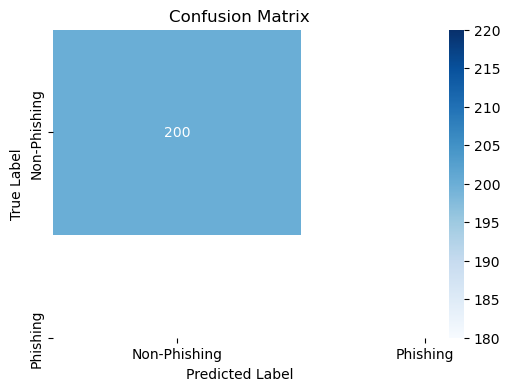

In [78]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Prediksi probabilitas
y_pred_prob = model.predict(X_test_pad)
# Ubah jadi label 0/1
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Phishing', 'Phishing'],
            yticklabels=['Non-Phishing', 'Phishing'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [85]:
print(classification_report(
    y_test, y_pred, 
    labels=[0,1], 
    target_names=['Non-Phishing', 'Phishing'], 
    zero_division=0
))


              precision    recall  f1-score   support

Non-Phishing       0.00      0.00      0.00         0
    Phishing       1.00      1.00      1.00       200

    accuracy                           1.00       200
   macro avg       0.50      0.50      0.50       200
weighted avg       1.00      1.00      1.00       200



## Perbandingan Model apabila menggunakan beberapa algoritma

In [ ]:
# Gunakan line chart atau barchart untuk perbandingannya